# p.111 Survival Analysis

"Introduction to Algorithmic Marketing" 読書会の担当分資料

生存分析に関して、ちょうど良いpythonライブラリ [`lifelines`](https://lifelines.readthedocs.io/en/latest/index.html) があったので、自分で実装するのはサボって、ライブラリをそのまま使うことにした。

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import lifelines

p.111 Table 3.5 をDataFrameとして入力する。

In [28]:
ix = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
pp = np.array([0,0,0,1,1,1,1,1,0,1,0,1])
ne = np.array([2,2,3,1,2,3,4,5,2,5,0,2])
dr = np.array([5,0,0,0,10,0,0,5,10,5,0,5])
pt = np.array([5,10,20,6,2,15,20,6,8,13,20,8])
ob = np.array([(0 if x==20 else 1) for x in [5,10,20,6,2,15,20,6,8,13,20,8]])

df = pd.DataFrame({'previous_purchase':pp, 'number_of_emails':ne, 
                   'discount_rate':dr, 'purchase_time':pt, 'observed':ob}, index=ix)
df

,discount_rate,number_of_emails,observed,previous_purchase,purchase_time
1,5,2,1,0,5
2,0,2,1,0,10
3,0,3,0,0,20
4,0,1,1,1,6
5,10,2,1,1,2
6,0,3,1,1,15
7,0,4,0,1,20
8,5,5,1,1,6
9,10,2,1,0,8
10,5,5,1,1,13


/Users/takashi_miyamoto/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


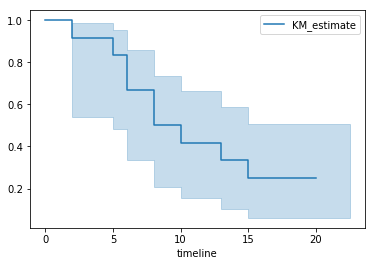

In [29]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(df['purchase_time'], event_observed=df['observed'])
kmf.survival_function_
kmf.median_
kmf.plot()

Cox比例ハザードモデルでフィットする。
p.110 式(3.20) とはちょっと数値が違うが、まぁ気にしないことに。

In [30]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(df, 'purchase_time', event_col='observed')
cph.print_summary()

n=12, number of events=9

                     coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95   
discount_rate      0.3049     1.3564    0.1219  2.5017 0.0124      0.0660      0.5437  *
number_of_emails  -0.3977     0.6719    0.3119 -1.2751 0.2023     -1.0089      0.2136   
previous_purchase  1.4951     4.4598    0.9729  1.5368 0.1243     -0.4117      3.4019   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.779


p.112 Figure 3.14: Email の数を変更した場合の、plot。
ちょっと表示が違うが、同じような plot はこのライブラリでも出せる。

/Users/takashi_miyamoto/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


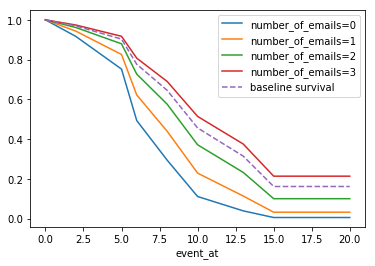

In [31]:
cph.plot_covariate_groups('number_of_emails', [0,1,2,3])

p.112 Figure 3.15: 同様に、discount rate を変更した場合の plot。

/Users/takashi_miyamoto/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


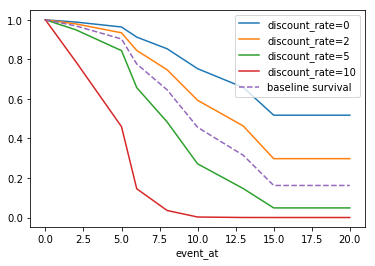

In [32]:
cph.plot_covariate_groups('discount_rate', [0,2,5,10])